<a href="https://colab.research.google.com/github/justpablo/tmsql_ml_project2_model_training/blob/main/MINST_Dataset_UseCase_pabloreynoso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Enhance IT**
## **Project 2**: *Classification Model: Use Case*
## **Data**: *MINST Database*
## **Profesor**: *Jaime Ruiz*
## **Group**: *The Matrix SQL*
## **Student**: *Pablo Reynoso*
## **Date**: *December 20th, 2021*




The *Modified National Institute of Standards and Technology* (MINST) database  is a large database of handwritten digits commonly used for training various image processing systems.

* Created on 1998.
* Modification of *NIST* (physical sciences lab/agency of US Deparment of Commerce) database.
* Training observations from United States Census Bureau.
* Testing observations from US high school students.
* Images normalized 28x28 pixels in grayscale.
* Dataset Dimensions:
  * Train (60000 observations x 787 features)
  * Test  (10000 observations x 787 features)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn; sn.set()

from scipy.stats import multivariate_normal as mvn

data_train = pd.read_csv('/content/drive/MyDrive/Classroom/Matrix_SQL/project2_minst_model/MNIST_train.csv')
data_test = pd.read_csv('/content/drive/MyDrive/Classroom/Matrix_SQL/project2_minst_model/MNIST_test.csv')

## A) Dataset Dimensions
### Curse of Dimensionality on my dataset? No.

In [2]:
# Training Set Dimensions
print("Training set dimensions: "+str(data_train.shape))
# Testing Set Dimensions
print("Testing set dimensions: "+str(data_test.shape))
print("\n")

print(data_train.head())

dummy_cols = ['Unnamed: 0', 'index']

# Remove Index Columns (Unnamed: 0, index)
data_train = data_train.drop(dummy_cols, axis=1)
data_test = data_test.drop(dummy_cols, axis=1)

# Review if Dummy Attributes
#print(data_train)
#print("\n")
# Review Data (Training) Attributes (Pixels) Statistics
#print(data_train.head())

# Renaming Columns
columns = ["pixel_"+str(px)for px in data_train.columns.tolist()[1:]]
data_train.set_axis(data_train.columns.tolist()[:1]+columns, axis=1, inplace=True)
data_test.set_axis(data_test.columns.tolist()[:1]+columns, axis=1, inplace=True)

print("\n")
# Training Set Dimensions
print("Training set dimensions: "+str(data_train.shape))
# Testing Set Dimensions
print("Testing set dimensions: "+str(data_test.shape))
print("\n")
print(data_train.head())


# Temporal Full Copy of Sets
data_test_ = data_test.copy(deep=True)
data_train_ = data_train.copy(deep=True)

Training set dimensions: (60000, 787)
Testing set dimensions: (10000, 787)


   Unnamed: 0  index  labels  0  1  2  3  ...  777  778  779  780  781  782  783
0           0      0       5  0  0  0  0  ...    0    0    0    0    0    0    0
1           1      1       0  0  0  0  0  ...    0    0    0    0    0    0    0
2           2      2       4  0  0  0  0  ...    0    0    0    0    0    0    0
3           3      3       1  0  0  0  0  ...    0    0    0    0    0    0    0
4           4      4       9  0  0  0  0  ...    0    0    0    0    0    0    0

[5 rows x 787 columns]


Training set dimensions: (60000, 785)
Testing set dimensions: (10000, 785)


   labels  pixel_0  pixel_1  ...  pixel_781  pixel_782  pixel_783
0       5        0        0  ...          0          0          0
1       0        0        0  ...          0          0          0
2       4        0        0  ...          0          0          0
3       1        0        0  ...          0          0          0
4   

## B) Splitting Training Data to (X,y)

In [3]:
# Splitting Training Set
y_train = data_train.iloc[:,0]
X_train = data_train.iloc[:,1:]

# Splitting Testing Set
y_test = data_test.iloc[:,0]
X_test = data_test.iloc[:,1:]

## C) Labels Representation 

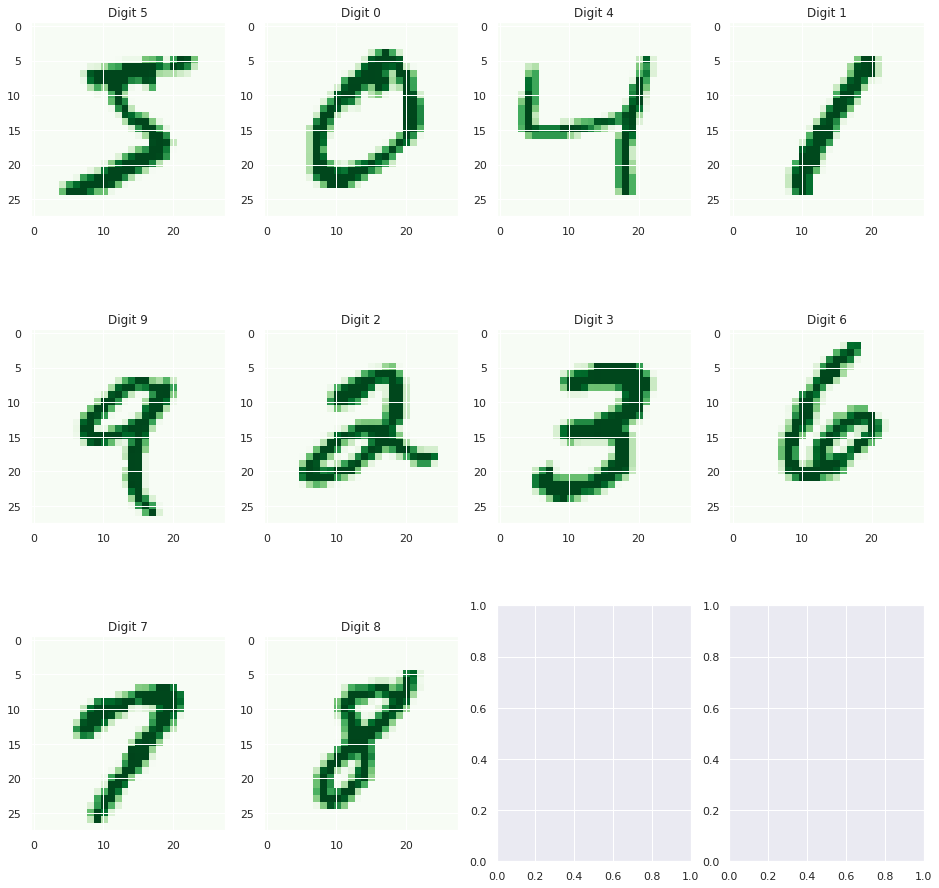

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [6]:
#Digital Representation of Labels (Digits)
labels = data_train['labels'].unique()
imgs = []

_, axs = plt.subplots(3, 4, figsize=(16, 16))
axs = axs.flatten()
for label, ax in zip(labels, axs):
  digit_obs = X_train[y_train==label]

  # Display of Digits in Grid
  plt.figure(figsize = (6,6))
  ax.set_title('Digit '+str(label))
  digit_img = digit_obs.iloc[0,:].to_numpy().reshape(28,28)
  ax.imshow(digit_img, cmap='Greens')
  # Individual Display
  #plt.imshow(digit_img, cmap='gray')

plt.savefig('figure0_digits_matrix_representation.png') 
plt.show()


## D) Check for Missing Data / Duplicate Rows

In [5]:
# Check if Missing Values in Attributes (Pixels)
attrs_missing_vals = data_train.columns[data_train.isna().any()].tolist()
print("# Attributes with Missing Values: "+str(len(attrs_missing_vals)))

# Fill Attributes' Nans if Any
if len(attrs_missing_vals) > 0:
  for attr in attrs_missing_vals:
    data_train[attr] = data_train[attr].fillna((data_train[attr].mean())) # If Even Dist
    #data_train[attr] = data_train[attr].fillna((data_train[attr].median())) # If Skewed Dist

# Check for Duplicates in Observations (Images)
rows_duplicated = data_train[data_train.duplicated(subset=None, keep='first')==True].shape[0]
print("# Rows Duplicated: "+str(rows_duplicated))
if rows_duplicated > 0:
  data_train.drop_duplicates(keep="first",inplace=True)

# Attributes with Missing Values: 0
# Rows Duplicated: 0


## E) Class (Digits) Distribution


### Is my dataset imbalanced? No.

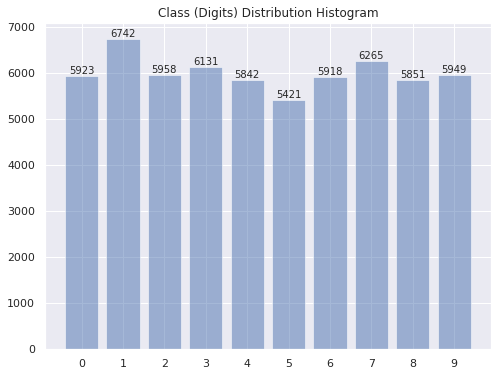

In [13]:
classes = data_train['labels'].unique()
dist_class = [len(X_train[y_train==c].index.tolist()) for c in classes]

sorted_pairs = sorted(zip(classes, dist_class))
classes, dist_class = [ list(t) for t in zip(*sorted_pairs)]

plt.figure(figsize=(8, 6))
plt.bar(classes, dist_class, alpha=0.5, tick_label=classes)
plt.title('Class (Digits) Distribution Histogram')

for i in range(len(dist_class)):
    plt.annotate(str(dist_class[i]), xy=(classes[i],dist_class[i]), ha='center', va='bottom')
    
plt.savefig('figure1_class_distribution_hist.png') 
plt.show()

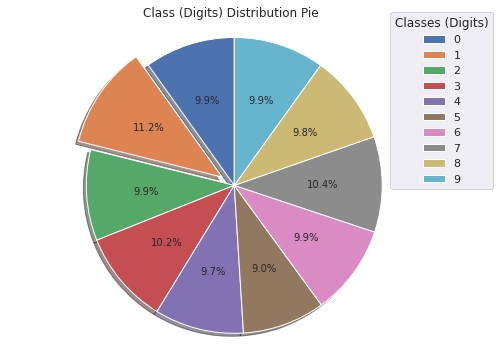

In [14]:
plt.figure(figsize=(8, 6))
plt.title('Class (Digits) Distribution Pie')
plt.pie(dist_class, explode=(0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0), labels=None, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.legend(bbox_to_anchor=(1.1, 1.05), labels=classes, title="Classes (Digits)")
plt.savefig('figure1_class_distribution_pie.png') 
plt.show()


## F) Classification Models

In [7]:
print("::Training Set Specs::")
print("X dimensions: "+str(X_train.shape))
print("y dimensions: "+str(y_train.shape))
print("X features: "+str(X_train.columns))
print("y variables: "+str(y_train.name))

::Training Set Specs::
X dimensions: (60000, 784)
y dimensions: (60000,)
X features: Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_774', 'pixel_775', 'pixel_776', 'pixel_777', 'pixel_778',
       'pixel_779', 'pixel_780', 'pixel_781', 'pixel_782', 'pixel_783'],
      dtype='object', length=784)
y variables: labels


In [8]:
# NOTE: Supervised Learning Algorithm (Classification) -Bayes Theorem (Cov Matrix) (inputs as numpy.array)
class GaussBayes():
  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:] 
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis=0)

      self.priors[k] = len(X_k)/len(X)
      self.likelihoods[k] = {"mean": mu_k, "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X,l["mean"],l['cov'])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [9]:
# NOTE: Lazy Learning Algorithm (Classification) -Similarities/Euclidean Distance (inputs as numpy.array)
class KNNClassifier():

  def fit(self, X, y):
    self.X=X
    self.y=y
    
  def predict(self, X, K, epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()

    return y_hat

In [10]:
# KPI - Classification Key Performance Indicators
# Accuracy: ACC = Obs. Correct / Total Obs.
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

# Confusion Matrix for Multi-Label Classification: (Max(Diagonal Sum), Balanced Performance for Every Label)
def confusion_matrix(y, y_hat):
  return pd.crosstab(y, y_hat)

## F) Model Training



In [14]:
# GaussBayes Training 
gbm = GaussBayes()
gbm.fit(X_train.to_numpy(), y_train.to_numpy())
y_train_hat = gbm.predict(X_train.to_numpy())
acc = accuracy(y_train,y_train_hat)
print("GaussBayes Training Accuracy: acc="+str(acc))

GaussBayes Training Accuracy: acc=0.78565


In [15]:
# KNN Training 
knn = KNNClassifier()
knn.fit(X_train.to_numpy(), y_train.to_numpy())
y_train_hat = knn.predict(X_train.to_numpy(),3)
acc = accuracy(y_train,y_train_hat)
print("KNN Training Accuracy: acc="+str(acc))

KNN Training Accuracy: acc=1.0


## G) Model Evaluation KPIs (Accuracy, Confusion Matrix)

GaussBayes Testing Accuracy: acc=0.7532


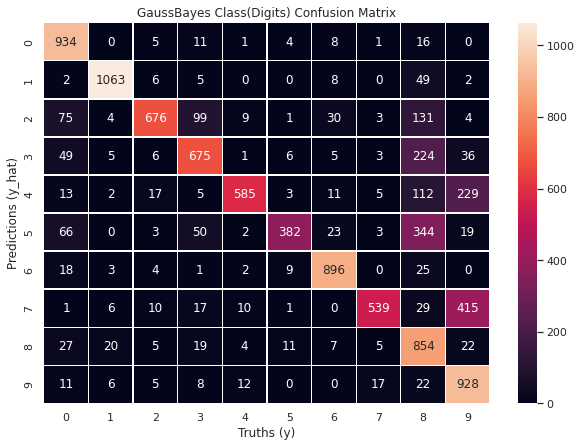

In [85]:
# GaussBayes Testing 
y_test_hat = gbm.predict(X_test.to_numpy())
acc = accuracy(y_test,y_test_hat)
print("GaussBayes Testing Accuracy: acc="+str(acc))

# Confusion Matrix
cm = confusion_matrix(y_test,y_test_hat)
plt.figure(figsize = (10,7))
plt.title("GaussBayes Class(Digits) Confusion Matrix")
s = sn.heatmap(cm, fmt="d", linewidths=.3, annot=True)
s.set(xlabel='Truths (y)', ylabel='Predictions (y_hat)')
#plt.show()
plt.savefig('figure2_y_vs_y_hat_cm_gbm_raw.png') 

KNN Testing Accuracy: acc=0.9717


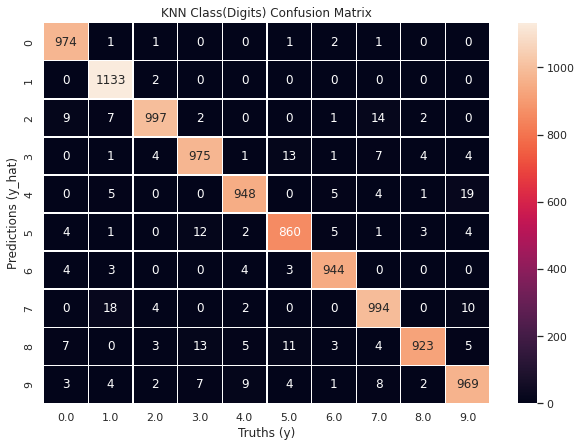

In [16]:
# KNN Testing 
y_test_hat = knn.predict(X_test.to_numpy(),3)
acc = accuracy(y_test,y_test_hat)
print("KNN Testing Accuracy: acc="+str(acc))

# Confusion Matrix
cm = confusion_matrix(y_test,y_test_hat)
plt.figure(figsize = (10,7))
plt.title("KNN Class(Digits) Confusion Matrix")
s = sn.heatmap(cm, fmt="d", linewidths=.3, annot=True)
s.set(xlabel='Truths (y)', ylabel='Predictions (y_hat)')
plt.savefig('figure2_y_vs_y_hat_cm_knn_raw.png') 
plt.show()


## H) Data Normalization Min-Max [Xi,j - Min(Xj) / Max(Xj) - Min(Xj)]

In [11]:
X_train_n = X_train.copy(deep=True)
X_test_n = X_test.copy(deep=True)

for pixel in X_train.columns.tolist():
  X_train_n[pixel] = 1.0 * (X_train[pixel] - X_train[pixel].min()) / (1+X_train[pixel].max() - X_train[pixel].min())
  X_test_n[pixel] = 1.0 * (X_test[pixel] - X_test[pixel].min()) / (1+X_test[pixel].max() - X_test[pixel].min())

print(X_train_n)
print(X_test_n)

       pixel_0  pixel_1  pixel_2  ...  pixel_781  pixel_782  pixel_783
0          0.0      0.0      0.0  ...        0.0        0.0        0.0
1          0.0      0.0      0.0  ...        0.0        0.0        0.0
2          0.0      0.0      0.0  ...        0.0        0.0        0.0
3          0.0      0.0      0.0  ...        0.0        0.0        0.0
4          0.0      0.0      0.0  ...        0.0        0.0        0.0
...        ...      ...      ...  ...        ...        ...        ...
59995      0.0      0.0      0.0  ...        0.0        0.0        0.0
59996      0.0      0.0      0.0  ...        0.0        0.0        0.0
59997      0.0      0.0      0.0  ...        0.0        0.0        0.0
59998      0.0      0.0      0.0  ...        0.0        0.0        0.0
59999      0.0      0.0      0.0  ...        0.0        0.0        0.0

[60000 rows x 784 columns]
      pixel_0  pixel_1  pixel_2  ...  pixel_781  pixel_782  pixel_783
0         0.0      0.0      0.0  ...        0.0   

In [15]:
X_train_n.describe(include='all')
X_test_n.describe(include='all')

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,...,pixel_744,pixel_745,pixel_746,pixel_747,pixel_748,pixel_749,pixel_750,pixel_751,pixel_752,pixel_753,pixel_754,pixel_755,pixel_756,pixel_757,pixel_758,pixel_759,pixel_760,pixel_761,pixel_762,pixel_763,pixel_764,pixel_765,pixel_766,pixel_767,pixel_768,pixel_769,pixel_770,pixel_771,pixel_772,pixel_773,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000097,0.000100,0.000099,0.000172,0.000257,0.000409,0.000922,...,0.014836,0.010291,0.005509,0.003498,0.002169,0.001138,0.000453,0.000197,0.000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000138,0.000195,0.000348,0.000522,0.000630,0.000734,0.001230,0.001771,0.002181,0.002245,0.001790,0.001075,0.000706,0.000644,0.000335,0.000086,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009744,0.009958,0.009937,0.012325,0.013565,0.017641,0.025573,...,0.106602,0.086577,0.063084,0.049964,0.040123,0.029619,0.017061,0.012164,0.009809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010345,0.012194,0.016805,0.019565,0.022127,0.021406,0.029965,0.036229,0.039773,0.040665,0.038086,0.027650,0.022339,0.022583,0.015414,0.008571,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.

## I) Models Retrain

GaussBayes Testing Accuracy: acc=0.9103


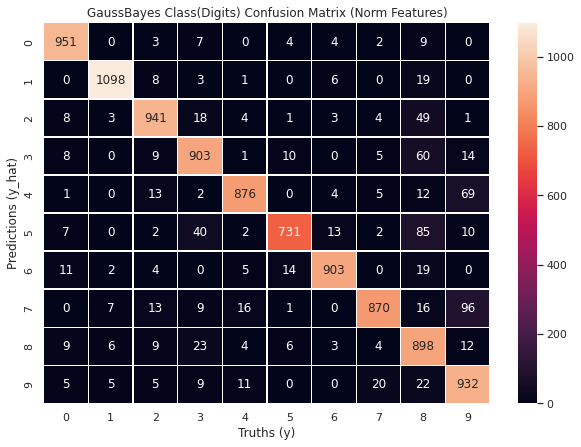

In [96]:
# GaussBayes Testing 
gbm = GaussBayes()
gbm.fit(X_train_n.to_numpy(), y_train.to_numpy())
y_test_hat = gbm.predict(X_test_n.to_numpy())
acc = accuracy(y_test,y_test_hat)
print("GaussBayes Testing Accuracy: acc="+str(acc))

# Confusion Matrix
cm = confusion_matrix(y_test,y_test_hat)
plt.figure(figsize = (10,7))
plt.title("GaussBayes Class(Digits) Confusion Matrix (Norm Features)")
s = sn.heatmap(cm, fmt="d", linewidths=.3, annot=True)
s.set(xlabel='Truths (y)', ylabel='Predictions (y_hat)')
#plt.show()
plt.savefig('figure4_y_vs_y_hat_cm_gbm_norm.png')

KNN Testing Accuracy: acc=0.9717


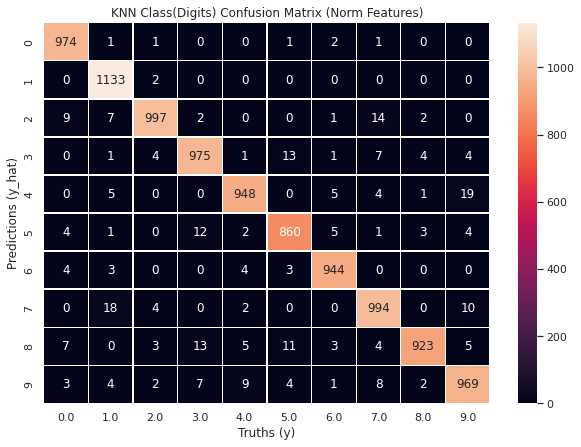

In [101]:
# KNN Testing 
knn = KNNClassifier()
knn.fit(X_train_n.to_numpy(), y_train.to_numpy())
y_test_hat = knn.predict(X_test_n.to_numpy(),3)
acc = accuracy(y_test,y_test_hat)
print("KNN Testing Accuracy: acc="+str(acc))

# Confusion Matrix
cm = confusion_matrix(y_test,y_test_hat)
plt.figure(figsize = (10,7))
plt.title("KNN Class(Digits) Confusion Matrix (Norm Features)")
s = sn.heatmap(cm, fmt="d", linewidths=.3, annot=True)
s.set(xlabel='Truths (y)', ylabel='Predictions (y_hat)')
plt.savefig('figure2_y_vs_y_hat_cm_knn_norm.png') 
plt.show()

## J) Find Bad Labeled Digits (Euclidean Distance)

In [114]:
def visualize_digits_discordances(discordances, label):
  digit_distances = discordances[label]['euclidean']
  digit_X_train = discordances[label]['X_train']
  digit_obs_index = discordances[label]['X_train'].index.tolist()

  _, axs = plt.subplots(3, 4, figsize=(16, 16))
  axs = axs.flatten()
  for obs_i, ax, dd in zip(digit_obs_index, axs, digit_distances):
    digit_obs = X_train.iloc[obs_i]
    # Display of Digits in Grid
    plt.figure(figsize = (6,6))
    ax.set_title('Digit: '+str(label)+' Obs: '+str(obs_i)+' Dist: %.2f'%dd)
    digit_img = digit_obs.to_numpy().reshape(28,28)
    ax.imshow(digit_img, cmap='Greens')
    # Individual Display
    #plt.imshow(digit_img, cmap='gray')

  plt.savefig('figure3_K_discordant_examples_digit'+str(label)+'.png') 
  plt.show()

In [61]:
# Finding Bad Labeled Digit in terms of Euclidean Distance Similarity (K-Less Similar)
K = 12
labels = data_train['labels'].unique()
discordances = dict()

for label in labels:
  ds_ = dict()
  digit_obs = X_train[y_train==label]
  euclidean_dist = np.sqrt(np.sum((digit_obs - np.mean(digit_obs, axis=0))**2, axis=1))
  #print(euclidean_dist.nlargest(n=K))
  less_k_similar = euclidean_dist.nlargest(n=K).index.tolist()
  ds_['euclidean'] =  euclidean_dist[less_k_similar].tolist()
  ds_['X_train'] = X_train.iloc[less_k_similar]
  ds_['y_train'] = y_train.iloc[less_k_similar]
  discordances[label] = ds_

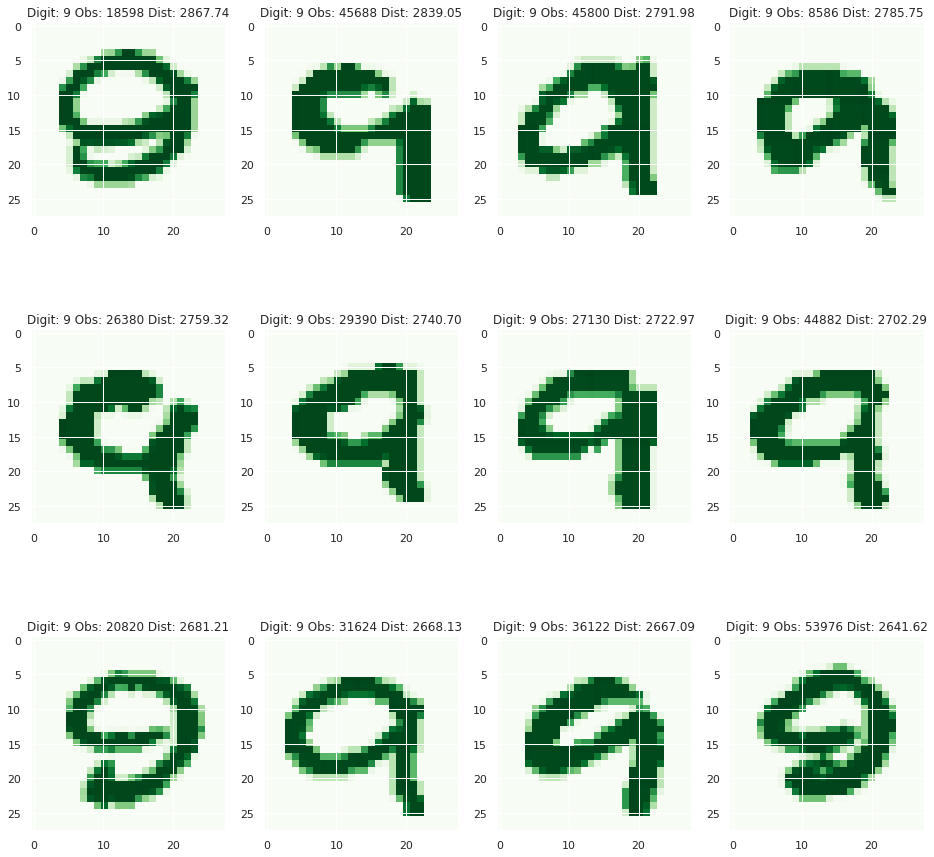

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<Figure size 432x432 with 0 Axes>

In [124]:
# The K=12 Most Discordant Observations per every Digit

#visualize_digits_discordances(discordances, 0) #Potential Mislabeled X[41358,:]
#visualize_digits_discordances(discordances, 1) #Potential Mislabeled X[16376,:]
#visualize_digits_discordances(discordances, 2) #Potential Mislabeled X[52938,:]
#visualize_digits_discordances(discordances, 3) #Potential Mislabeled X[47689,:]
#visualize_digits_discordances(discordances, 4)
#visualize_digits_discordances(discordances, 5)
#visualize_digits_discordances(discordances, 6)
#visualize_digits_discordances(discordances, 7)
#visualize_digits_discordances(discordances, 8)
visualize_digits_discordances(discordances, 9)

## J) Correlation Constant/Variable Pixel

pixel_0
['pixel_12', 'pixel_13', 'pixel_14', 'pixel_15', 'pixel_32', 'pixel_33', 'pixel_34', 'pixel_35', 'pixel_36', 'pixel_37', 'pixel_38', 'pixel_39', 'pixel_40', 'pixel_41', 'pixel_42', 'pixel_43', 'pixel_44', 'pixel_45', 'pixel_46', 'pixel_47', 'pixel_48', 'pixel_49', 'pixel_50', 'pixel_51', 'pixel_58', 'pixel_59', 'pixel_60', 'pixel_61', 'pixel_62', 'pixel_63', 'pixel_64', 'pixel_65', 'pixel_66', 'pixel_67', 'pixel_68', 'pixel_69', 'pixel_70', 'pixel_71', 'pixel_72', 'pixel_73', 'pixel_74', 'pixel_75', 'pixel_76', 'pixel_77', 'pixel_78', 'pixel_79', 'pixel_80', 'pixel_81', 'pixel_86', 'pixel_87', 'pixel_88', 'pixel_89', 'pixel_90', 'pixel_91', 'pixel_92', 'pixel_93', 'pixel_94', 'pixel_95', 'pixel_96', 'pixel_97', 'pixel_98', 'pixel_99', 'pixel_100', 'pixel_101', 'pixel_102', 'pixel_103', 'pixel_104', 'pixel_105', 'pixel_106', 'pixel_107', 'pixel_108', 'pixel_109', 'pixel_110', 'pixel_113', 'pixel_114', 'pixel_115', 'pixel_116', 'pixel_117', 'pixel_118', 'pixel_119', 'pixel_120', 

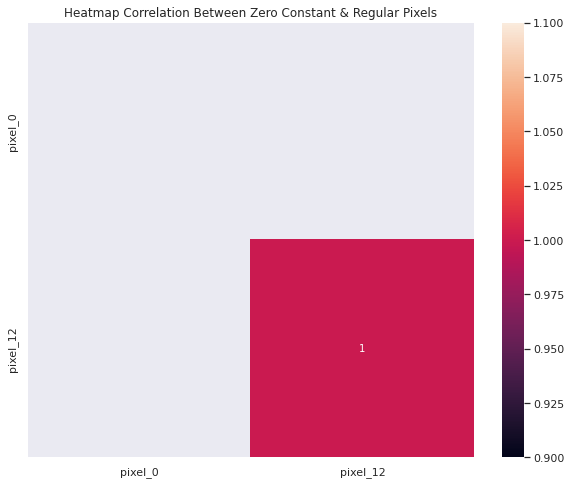

In [12]:
# Columns with Constant Value
constant_pixels = X_train_n.nunique(axis=0)[X_train_n.nunique(axis=0)==1].index.tolist()

# Columns with Variable Value
variable_pixels = X_train_n.nunique(axis=0)[X_train_n.nunique(axis=0)>1].index.tolist()

print(constant_pixels[0])
print(variable_pixels)

# Observe Heatmap Correlations Between Constant Zero Constraint Attribute & Regular Attribute
correlation = X_train_n[[constant_pixels[0], variable_pixels[0]]].corr()
plt.figure(figsize=(10,8))
sn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title('Heatmap Correlation Between Zero Constant & Regular Pixels')
plt.savefig('figure3_heatmap_correlations_const_reg_pixels.png') 

<Figure size 720x576 with 0 Axes>

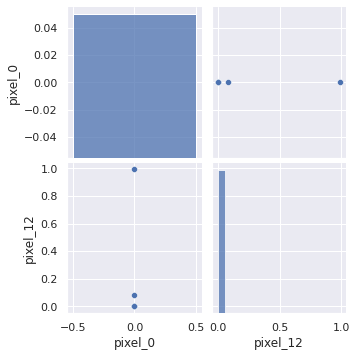

In [14]:
# Observe Pairplot Correlations Between Constant Zero Constraint Attribute & Regular Attribute
plt.figure(figsize=(10,8))
sn.pairplot(X_train_n[[constant_pixels[0], variable_pixels[0]]])
plt.savefig('figure3_pairplot_correlations_const_reg_pixels.png') 


## *) Feature Selection






#### The Testing Accuracy results for Gauss Bayes & KNN generalization, 0.9103, 0.9717 respectively, were above Jaime KPI [accuracy=0.75] criteria.Therefore a feature selection was not considered in the experiments. Confusion Matrix was implemented to represent learninig generalization for the 10 (digits) labels considered in the experiment. 